In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,  Bidirectional

# Load the dataset
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [6]:
# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)

# Create training data with 60 timesteps
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping the dataset
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Build the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.3))

model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.4))

model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32)



Epoch 1/100

38/38 [==============================] - 12s 59ms/step - loss: 0.0300
Epoch 2/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0062
Epoch 5/100
38/38 [==============================] - 2s 64ms/step - loss: 0.0057
Epoch 6/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0057
Epoch 9/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0050
Epoch 11/100
38/38 [==============================] - 2s 64ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0044
Epoch 13/100
38/38 [=

38/38 [==============================] - 3s 67ms/step - loss: 0.0022
Epoch 94/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0021
Epoch 95/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0017
Epoch 96/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0019
Epoch 97/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0018
Epoch 98/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0018
Epoch 99/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0017
Epoch 100/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0017


In [10]:
# Prepare test data
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

# Create test data
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

1/1 [==============================] - 2s 2s/step


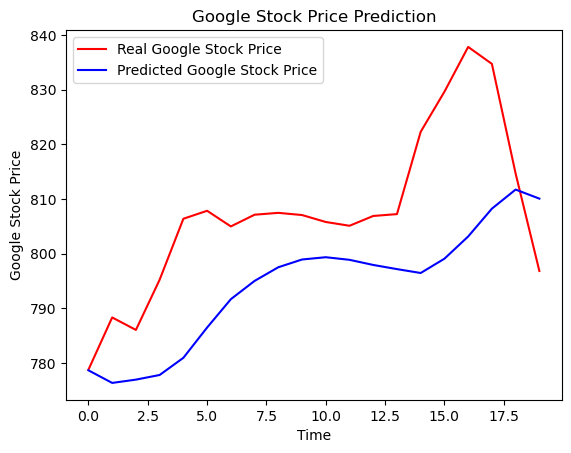

In [11]:
# Predict stock prices
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualize the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
# Calculate mean squared error for the test set
mse_test = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print("Mean Squared Error on Test Set: {:.4f}".format(mse_test))

